# Análise exploratória de dados

In [2]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))


## Coleta de Dados ##

In [3]:
        df = sns.load_dataset('exercise')
        df.to_csv('/home/samuel_caldeira/avanti-bootcamp/data/raw.csv', index=False)
        df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [4]:
df.sample(5)

,Unnamed: 0,id,diet,pulse,time,kind
19,19,7,no fat,88,15 min,rest
55,55,19,no fat,98,15 min,walking
18,18,7,no fat,87,1 min,rest
89,89,30,no fat,150,30 min,running
88,88,30,no fat,111,15 min,running


## 1. Descrição dos dados

Dados sobre exercícios físicos, medições de pulso e tipos de dieta. Além disso, os dados envolvem as medições de pulso em diferentes intervalos de tempo e em diferentes condições físicas.

## 2. Perguntas de partida e hipóteses

        -Existem dados ausentes?
        -Os dados são aparetemente discrepantes?
        -Os valores dos pulsos medidos sofrem influência do tipo de dieta?
        -Os três tempos diferentes nas medições de pulso favorecem o tratamento estatístico?
        -Quando se aumenta o tempo de medida, o valor médio de pulsação aumenta?
        -Qual a distribuição dos dados?

Existem dados ausentes nas colunas?

In [5]:
df = pd.read_csv('/home/samuel_caldeira/avanti-bootcamp/data/raw.csv')
df.isnull().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

Qual a distribuição dos dados?

In [6]:
df.describe(include='all')

,Unnamed: 0,id,diet,pulse,time,kind
count,90.000000,90.000000,90,90.000000,90,90
unique,NaN,NaN,2,NaN,3,3
top,NaN,NaN,low fat,NaN,1 min,rest
freq,NaN,NaN,45,NaN,30,30
mean,44.500000,15.500000,NaN,99.700000,NaN,NaN
std,26.124701,8.703932,NaN,14.858471,NaN,NaN
min,0.000000,1.000000,NaN,80.000000,NaN,NaN
25%,22.250000,8.000000,NaN,90.250000,NaN,NaN
50%,44.500000,15.500000,NaN,96.000000,NaN,NaN
75%,66.750000,23.000000,NaN,103.000000,NaN,NaN


--Existem dois tipos de dieta,
--A dieta low fat é a mais comum,
--O tempo mais utilizado para as medições foi de 1 minuto,
--A medição do pulso poderia ser feita de três formas diferentes,
--A medição mais comum foi em repouso,
--A média da pulsação foi de 99.77,
--A pulsação mínima foi de 80 e a máxima de 150.


Distribuição das variáveis qualitativas

## Dicionário de dados ##

In [7]:
dicionario = pd.DataFrame([
    {
        "variavel": "id",
        "descricao": "identificacao",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "diet",
        "descricao": "dieta do animal",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "pulse",
        "descricao": "frequencia cardiaca",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "kind",
        "descricao": "em exercicio ou repouso",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    }
])
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,id,identificacao,quantitativa,discreta
1,diet,dieta do animal,qualitativa,nominal
2,pulse,frequencia cardiaca,quantitativa,discreta
3,kind,em exercicio ou repouso,qualitativa,nominal


In [8]:
# Obter as variáveis quantitativas
variaveis_quantitativas = dicionario[dicionario['tipo'] == 'quantitativa']['variavel'].tolist()
print(f"Variáveis Quantitativas: {variaveis_quantitativas}")

Variáveis Quantitativas: ['id', 'pulse']


In [9]:
# Obter as variáveis qualitativas
variaveis_qualitativas = dicionario[dicionario['tipo'] == 'qualitativa']['variavel'].tolist()
print(f"Variáveis Qualitativas: {variaveis_qualitativas}")

Variáveis Qualitativas: ['diet', 'kind']


In [11]:
print(dicionario.columns)

Index(['variavel', 'descricao', 'tipo', 'subtipo'], dtype='object')


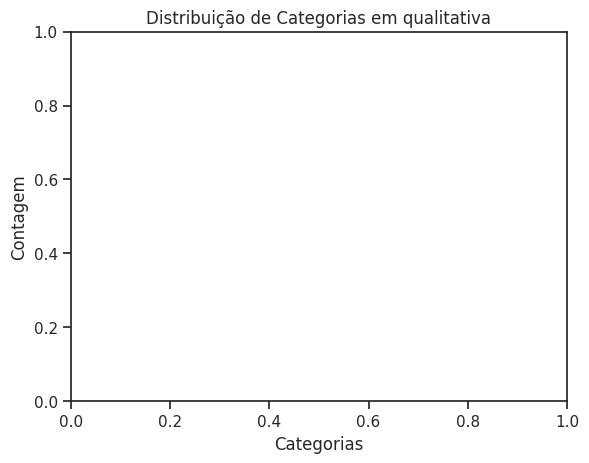

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/samuel_caldeira/avanti-bootcamp/data/raw.csv')
plt.title('Distribuição de Categorias em qualitativa')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.show()


In [20]:
# Identifique variáveis quantitativas (supondo que você tenha esse código)
variaveis_quantitativas = dicionario[dicionario['tipo'] == 'quantitativa']['variavel'].tolist()
print(f"Variáveis Quantitativas: {variaveis_quantitativas}")


Variáveis Quantitativas: ['id', 'pulse']


/home/samuel_caldeira/.cache/pypoetry/virtualenvs/src-E9PfQQ1C-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


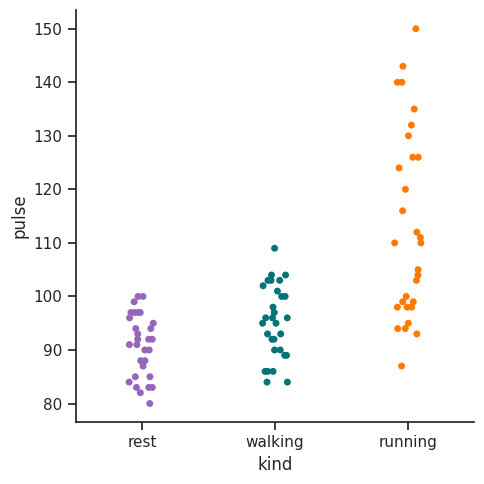

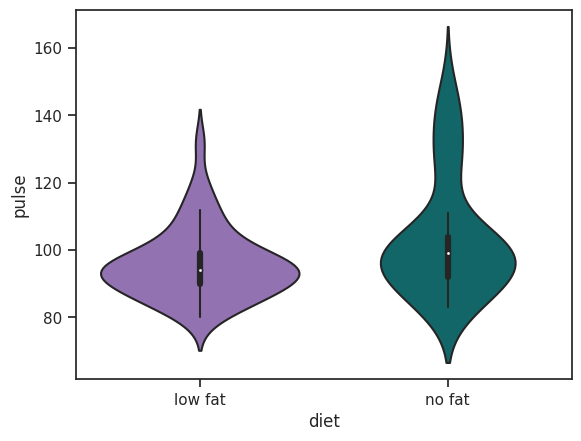

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
dados = pd.read_csv('/home/samuel_caldeira/avanti-bootcamp/data/raw.csv')

# Plotar gráfico de barras
sns.catplot(x="kind", y="pulse", data=dados)
plt.show()

# Plotar violin plot
sns.violinplot(x="diet", y="pulse", data=dados)
plt.show()

## 3. Insights ##

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:
-A frequencia cardíaca aumenta quando o exercício praticado é a corrida.
-A caminhada aumenta um pouco a frequência cardíaca.
-Aparentemente, as pessoas com dietas no fat possuem uma maior frequência cardíaca, talvez isso tenha a ver com o metabolismo auxiliado pela dieta.

